In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
features, targets = make_classification(n_samples = 20,
                                      n_features = 3,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

In [3]:
df = pd.DataFrame(data=features, columns=['x1', 'x2','x3'])
df['targets'] = targets
df.head()

,x1,x2,x3,targets
0,0.617203,0.120159,1.141704,1
1,-0.845206,-0.687173,-1.883225,0
2,1.252868,-0.754398,0.784959,1
3,-0.935769,-0.122890,-1.202688,0
4,2.100255,0.190915,1.118962,1


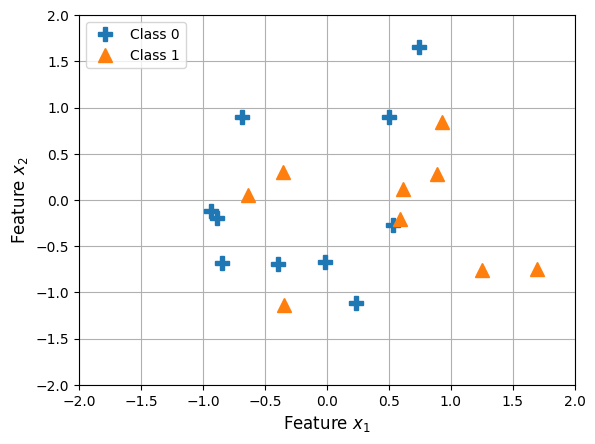

In [4]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [5]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [6]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2) # Re-initialize with 2 features
x = [3.23, 2.13]
ppn.forward(x)

0

The prediction in the above case is 0 because the weights and the bias of the perceptron are still 0. It has not learned anything yet.

In [7]:
# Check the parameters after the update rule
print("Model Parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model Parameters:
Weights: [0.0, 0.0]
Bias: 0


Train the Model

In [8]:


# Train function to automate the training process
def train(model, X_train, y_train, epochs):
    # Trining loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.forward(x)
            error_count += abs(error)
        
        print(f"Epoch {epoch + 1} errors {error_count}")

In [9]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 0
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


Evaluating the model
We can evaluate the model on the training data by comparing its predictions to the true labels and computing the prediction accuracy.

In [10]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x,y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [11]:

train_acc = compute_accuracy(ppn, features, targets)
print("Model accuracy:", train_acc)

Model accuracy: 0.5



7. Plotting the Decision Boundary
Finally, we can visualize the perceptron's linear decision boundary. The line that the Perceptron learns is where the weighted_sum_z is exactly 0.

z=(w1⋅x1)+(w2⋅x2)+b=0

We can solve this for x2 to get the equation of a line:

x2=−(w1⋅x1) / −bw2

We can use this equation to plot the line (or "dividing hyperplane") that our model has learned.

In [12]:
def plot_boundary(model):
    w1,w2 = model.weights[0], model.weights[1]
    b = model.bias

    # z = w1*x1 + w2*x2 + b = 0
    # => x2 = (-(w1*x1) -b) / w2

    # To prevent division by zero
    min = 1 / 100000000000

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / (w2 + min)

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / (w2 + min)

    return x1_min, x1_max, x2_min, x2_max

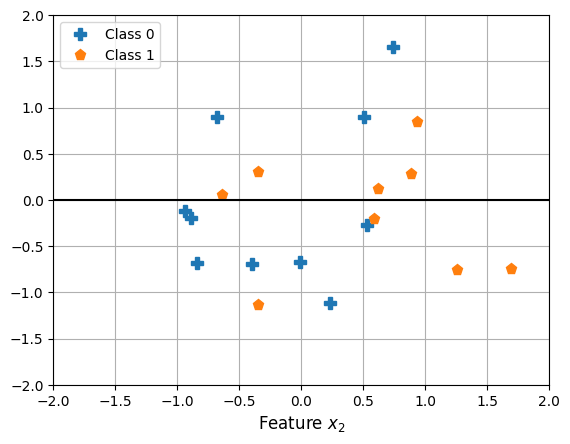

In [13]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="P",
    markersize=8,
    linestyle='',
    label = "Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="p",
    markersize=8,
    linestyle='',
    label = "Class 1",
)

# Plot the decsion boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.xlabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()